In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
data=pd.read_csv("data_assignment.csv")
# Describe types of the dataset
data.dtypes

Id                    int64
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [6]:
# Describe statistics of the numerical variables
data.describe()

,Id,LowestSalary,HighestSalary
count,1.499990e+05,149999.000000,149999.000000
mean,3.752134e+07,64.901766,86.072374
std,1.019004e+05,49.420658,56.932917
min,3.679538e+07,0.000000,30.000000
25%,3.742646e+07,30.000000,40.000000
50%,3.750692e+07,60.000000,70.000000
75%,3.760540e+07,100.000000,120.000000
max,3.771072e+07,200.000000,250.000000


In [7]:
# Describe the shape of the data
print(f"The data set has {data.size:,.0f} records, with {data.shape[0]:,.0f} rows and {data.shape[1]:,.0f} columns.")

The data set has 1,949,987 records, with 149,999 rows and 13 columns.


In [8]:
# Check the data visually
data.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [9]:
data.tail()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
149994,37709314,Dance Studio Coordinator,Grace Lutheran College,2018-11-13T00:00:00.000Z,Brisbane,Northern Suburbs,Education & Training,Management - Schools,Grace has a highly-regarded and active Perform...,<p>Grace has a highly-regarded and active Perf...,0,30,Part Time
149995,37709313,Geology Technician,Saracen Gold Mines Pty Ltd,2018-11-13T00:00:00.000Z,"Kalgoorlie, Goldfields & Esperance",NaN,"Mining, Resources & Energy",Mining - Exploration & Geoscience,"Due to an increase in our Exploration budget, ...","<p style=""text-align:justify;"">Saracen Mineral...",0,30,Full Time
149996,37709312,Lead Product Manager UX/UI,Opus Recruitment Solutions,2018-11-13T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Design & Architecture,Graphic Design,Senior Lead Product Manager | UX/UI | Payment/...,One Australia’s leading online payments platfo...,0,30,Full Time
149997,37709253,Junior Primary Teacher,Covenant Christian School (ACT),2018-11-13T00:00:00.000Z,ACT,NaN,Education & Training,Teaching - Primary,Junior Primary teacher to take a small single ...,<p><strong>Junior Primary Teacher (part time o...,0,30,Full Time
149998,37709311,Network Engineer,Robert Half Technology,2018-11-13T00:00:00.000Z,Perth,"CBD, Inner & Western Suburbs",Information & Communication Technology,Engineering - Network,Our client requires an experienced Network Eng...,<ul>\n <li><strong>Permanent Position...,0,30,Full Time


In [10]:
# Convert to datetime data type and only contain the date portion (removing time portion)
data['Date'] = pd.to_datetime(data['Date']).dt.date.astype('datetime64')
data.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object

In [11]:
# Data date period
print(f"The data covers the period from {min(data['Date']):%d of %B %Y} to {max(data['Date']):%d of %B %Y}")
print("Job postings have {} different dates".format(data["Date"].nunique()))

The data covers the period from 01 of October 2018 to 13 of November 2018
Job postings have 44 different dates


In [12]:
# Location count
print(f"The data have {data['Location'].nunique()} unique locations")
# Which location has the most job postings
print(f'{data["Location"].value_counts().index[0]} is the location with most job posting, with {data["Location"].value_counts()[0]:,.0f} posts')

The data have 65 unique locations
Sydney is the location with most job posting, with 46,357 posts


In [13]:
# How many job sectors are there
print("There are {} job sectors (job classifications) in the dataset".format(data["Classification"].nunique()))
# List of job sectors with job postings
print("List of each sector with total job postings")
print(data["Classification"].value_counts())

There are 30 job sectors (job classifications) in the dataset
List of each sector with total job postings
Information & Communication Technology    16661
Trades & Services                         14125
Healthcare & Medical                      12515
Hospitality & Tourism                     11818
Manufacturing, Transport & Logistics       9608
Administration & Office Support            7636
Accounting                                 7075
Education & Training                       7033
Retail & Consumer Products                 6496
Sales                                      6281
Construction                               6254
Government & Defence                       5926
Engineering                                4812
Mining, Resources & Energy                 4679
Community Services & Development           3528
Banking & Financial Services               3481
Human Resources & Recruitment              3233
Call Centre & Customer Service             3127
Legal                         

In [14]:
# Our group chose "Information & Communication Technology" sector
# Select the subclassification with the selected classification
sub_sector=data[data["Classification"]=="Information & Communication Technology"]["SubClassification"]
print("We chose the sector 'Information & Communication Technology', which has {} sub-sectors".format(sub_sector.nunique()))

# Print frequency of each subclassification
print("List of each sub-sector with their total job postings")
print(sub_sector.value_counts())

We chose the sector 'Information & Communication Technology', which has 22 sub-sectors
List of each sub-sector with their total job postings
Developers/Programmers                   3069
Business/Systems Analysts                2076
Programme & Project Management           1665
Architects                               1110
Engineering - Software                   1087
Help Desk & IT Support                   1074
Networks & Systems Administration         927
Consultants                               849
Other                                     742
Testing & Quality Assurance               606
Management                                561
Security                                  524
Engineering - Network                     402
Database Development & Administration     395
Web Development & Production              351
Sales - Pre & Post                        349
Product Management & Development          281
Telecommunications                        269
Team Leaders                   

In [15]:
# Calculate the range of the salary for each subclassification in the selected classification (ICT)
for i in sub_sector.unique():
    #calculate the lowest salary
    lstSal=min(data[data["SubClassification"]==i]["LowestSalary"])
    #calculate the highest salary
    hstSal=max(data[data["SubClassification"]==i]["HighestSalary"])
    #calculate the frequency of the sublclassification
    pst=sub_sector.value_counts()[i]
    print(f"'{i}' has a minimum salary of {lstSal}, maximum salary of {hstSal:,.0f} and {pst:,.0f} job postings.")

'Help Desk & IT Support' has a minimum salary of 0, maximum salary of 250 and 1,074 job postings.
'Sales - Pre & Post' has a minimum salary of 0, maximum salary of 250 and 349 job postings.
'Networks & Systems Administration' has a minimum salary of 0, maximum salary of 250 and 927 job postings.
'Programme & Project Management' has a minimum salary of 0, maximum salary of 250 and 1,665 job postings.
'Security' has a minimum salary of 0, maximum salary of 250 and 524 job postings.
'Consultants' has a minimum salary of 0, maximum salary of 250 and 849 job postings.
'Architects' has a minimum salary of 0, maximum salary of 250 and 1,110 job postings.
'Other' has a minimum salary of 0, maximum salary of 250 and 742 job postings.
'Business/Systems Analysts' has a minimum salary of 0, maximum salary of 250 and 2,076 job postings.
'Developers/Programmers' has a minimum salary of 0, maximum salary of 250 and 3,069 job postings.
'Web Development & Production' has a minimum salary of 0, maximum 

In [16]:
# Calculate the lowest and highest salary of each job type
data["JobType"].unique()
for i in data["JobType"].unique():
    #filter the nan case
    if type(i)==str:
        lstSal=min(data[data["JobType"]==i]["LowestSalary"])
        hstSal=max(data[data["JobType"]==i]["HighestSalary"])
        print("Job type {} the lowest salary is: {}, and the highest salary is: {}".format(i,lstSal,hstSal))

Job type Full Time the lowest salary is: 0, and the highest salary is: 250
Job type Contract/Temp the lowest salary is: 0, and the highest salary is: 250
Job type Part Time the lowest salary is: 0, and the highest salary is: 250
Job type Casual/Vacation the lowest salary is: 0, and the highest salary is: 250


part 2

In [17]:
# Calculate the average salary as an int64 data type and create a new column for it
# Average Salary is the Lowest Salary + the Highest Salary divided by two.
data["AverageSalary"]=((data["LowestSalary"]+data["HighestSalary"])/2).astype('int64')

In [18]:
# Id column is already set to an integer data type - it cannot contain characters
data['Id'].dtypes

dtype('int64')

In [19]:
# The Id value is an integer with 8 digits
id_min = min(data["Id"]) # Find the lowest or minimum value in the Id column
id_max = max(data["Id"]) # Find the highest or maximum value in the Id column
id_range = max(data["Id"])-min(data["Id"]) # Find the range in Id column

print(f"The lowest Id value is : {id_min}")
print(f"The highest Id value is: {id_max}")
print(f"The Id range:  {id_range}")

The lowest Id value is : 36795385
The highest Id value is: 37710725
The Id range:  915340


In [20]:
# We have already run the below to ensure the Date column is Data type = datetime and only showing the date and not time.

# Convert to datetime data type and only contain the date portion (explicitly removing time portion)
data['Date'] = pd.to_datetime(data['Date']).dt.date.astype('datetime64[ns]')

In [21]:
# We have already shown that 'Id' is numeric - int64
# We have already shown that 'Date' has been changed to datetime
# Confirm data types
data.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary                 int64
dtype: object

In [22]:
# Find duplicate data

# Look for duplicate rows - dont include 'Id' and show all copies of duplicated rows(so we can verify duplicates visually)
# We create a new data frame to store all duplicate rows
duplicateRows = data[data.duplicated(['Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
                                      'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
                                      'HighestSalary', 'JobType']
                                     ,keep=False)]
# keep=False means we keep all copies of duplicates(original + any duplicates of that original) - just for analysis purposes

In [23]:
# Print to check - we can see duplicates with different index and different Id
duplicateRows.head(4)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
1836,37402349,Senior SAP HR Functional Analyst,Queensland Rail,2018-10-05,Brisbane,CBD & Inner Suburbs,Government & Defence,Government - State,We currently have an exciting opportunity for ...,<p>We are a large and fully integrated infrast...,0,30,Contract/Temp,15
1837,37402347,Senior SAP HR Functional Analyst,Queensland Rail,2018-10-05,Brisbane,CBD & Inner Suburbs,Government & Defence,Government - State,We currently have an exciting opportunity for ...,<p>We are a large and fully integrated infrast...,0,30,Contract/Temp,15
2879,37401130,Diesel Fitter | Lifestyle Roster,Hays Resources & Mining,2018-10-05,Rockhampton & Capricorn Coast,NaN,"Mining, Resources & Energy",Mining - Engineering & Maintenance,Experienced Mine Site Diesel Fitter Job requir...,<p>Experienced Mine Site Diesel Fitter Job req...,0,30,Contract/Temp,15
2892,37401116,Diesel Fitter | Lifestyle Roster,Hays Resources & Mining,2018-10-05,Rockhampton & Capricorn Coast,NaN,"Mining, Resources & Energy",Mining - Engineering & Maintenance,Experienced Mine Site Diesel Fitter Job requir...,<p>Experienced Mine Site Diesel Fitter Job req...,0,30,Contract/Temp,15


In [24]:
# Count the duplicates in our new duplicateRows dataframe
duplicateRowsCount = duplicateRows.duplicated(['Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
                          'SubClassification', 'Requirement', 'FullDescription', 
                          'LowestSalary','HighestSalary', 'JobType'],keep='first').sum()
# Number of rows that are duplicate and should be discarded
duplicateRowsCount 

611

In [25]:
# Remove duplicate data (611 rows)

data.drop_duplicates(subset = ['Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'], keep = 'first', inplace = True)

In [26]:
# Check we removed the duplicates
checkDuplicateRows = data[data.duplicated(['Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],keep=False)]

# Duplicate count should now be zero
checkDuplicateRows.duplicated().sum()

0

In [27]:
# Confirm new dataset shape after removing duplicates
print(f"The data set has {data.size:,.0f} records, with {data.shape[0]:,.0f} rows and {data.shape[1]:,.0f} columns.")

The data set has 2,091,432 records, with 149,388 rows and 14 columns.


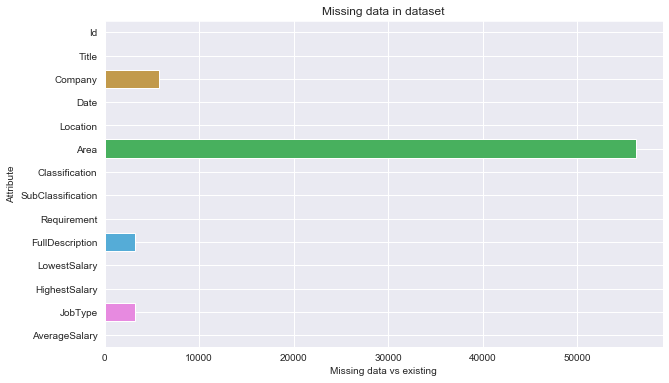

In [28]:
# Analyze missing data

y = data.isnull().sum().index
x = data.isnull().sum()

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 6))
y_pos = np.arange(len(y))

ax = sns.barplot(x,y_pos,data=data,orient = 'h')

ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.set_xlabel('Missing data vs existing')
ax.set_ylabel('Attribute')
ax.set_title('Missing data in dataset')
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)

plt.show()

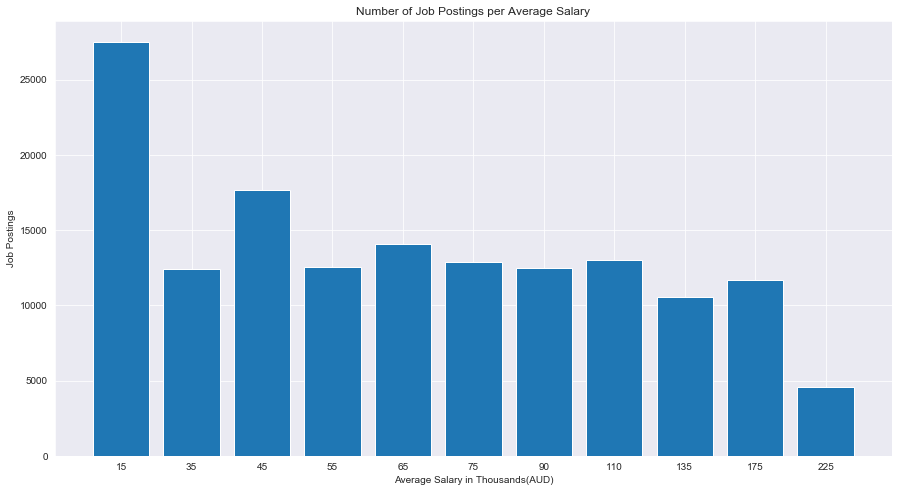

In [29]:
# Number of Job Postings per Average Salary

y = data["AverageSalary"].value_counts().sort_index()
x = data["AverageSalary"].value_counts().sort_index().index
x_pos=np.arange(len(x))

fig, ax = plt.subplots(figsize=(15,8))

plt.bar(x_pos, y)
plt.xticks(x_pos, x)
ax.set_title("Number of Job Postings per Average Salary")
ax.set_xlabel('Average Salary in Thousands(AUD)')
ax.set_ylabel('Job Postings')
plt.show()

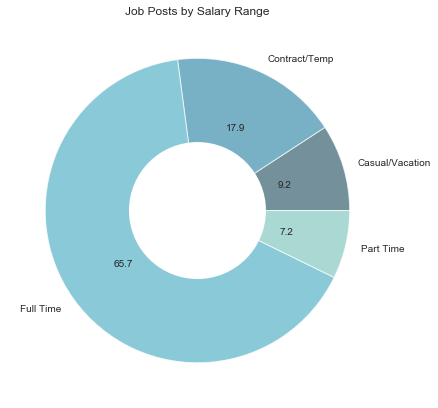

In [30]:
data_type=data[data["JobType"].isna()==False]
data_type=data_type.groupby("JobType").count()
data_type["Label"]=data_type.index
data_type["Count"]=data_type["Id"]

# Salary ranges plot
fig, ax = plt.subplots(figsize=(7,7)) 
ax.pie(data_type['Count'], colors=sns.color_palette("GnBu_d", len(data_type)),labels=data_type['Label'],wedgeprops={'alpha':0.7},autopct='%1.1f')
ax.set_title('Job Posts by Salary Range', loc='center')

# add centre circle to make it a donut
centre_circle2 = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0)
ax.add_patch(centre_circle2)

In [31]:
# Copy of the dataset filtering "Melbourne" location
melbourne = data[data["Location"]=='Melbourne']
melbourne_classification_count = melbourne.groupby('Classification').agg('count')

In [32]:
# Function to group lower ranking values
def group_lower_ranking_values(column):
    # Group the dataset melbourne by the parameter "column"
    pie_counts = melbourne.groupby(column).agg('count')
    # Create a variable which is filtered by quantile 50
    pct_value = pie_counts[lambda df: df.columns[0]].quantile(.50)
    # Filter values below the variable pct_value
    values_below_pct_value = pie_counts[lambda df: df.columns[0]].loc[lambda s: s < pct_value].index.values
    # Function to change the classification to "Other" where applies
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row 
    # Apply the fix_value function
    pie_grouped = melbourne.apply(fix_values, axis=1).groupby(column).agg('count')
    return pie_grouped

# Dataset after the function group_lower_ranking_values
melbourne_classification_count = group_lower_ranking_values('Classification')

In [33]:
# The labels of the pie
melbourne_labels = melbourne_classification_count.Id.sort_values().index
# The values of the pie
melbourne_counts = melbourne_classification_count.Id.sort_values()

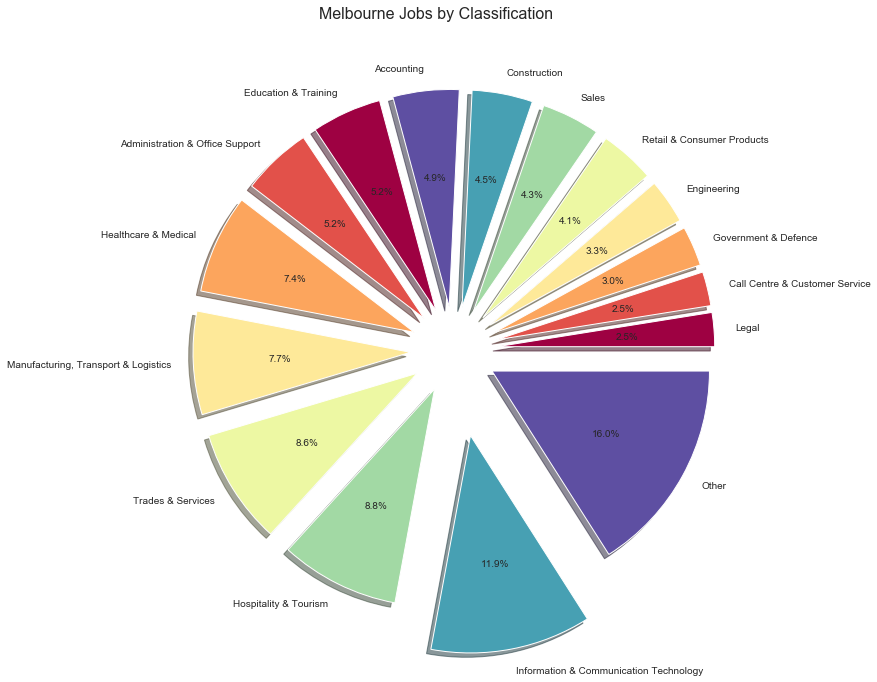

In [34]:
plt.figure(figsize=(20,10))
cmap = plt.get_cmap('Spectral')
# Change color every 8 plot
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
# The distance between the center, the value 0.4 will emphasize the variable "Information & Communication Technology "
explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.2)
# plot the pie
melbourne_pie = plt.pie(melbourne_counts, explode=explode,labels=melbourne_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.suptitle('Melbourne Jobs by Classification', fontsize=16)
plt.show()

In [39]:
top_cities=data["Location"].value_counts().index[:30]
top_cities_df=data[data["Location"].isin(top_cities)]
top_cities_df

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149994,37709314,Dance Studio Coordinator,Grace Lutheran College,2018-11-13,Brisbane,Northern Suburbs,Education & Training,Management - Schools,Grace has a highly-regarded and active Perform...,<p>Grace has a highly-regarded and active Perf...,0,30,Part Time,15
149995,37709313,Geology Technician,Saracen Gold Mines Pty Ltd,2018-11-13,"Kalgoorlie, Goldfields & Esperance",NaN,"Mining, Resources & Energy",Mining - Exploration & Geoscience,"Due to an increase in our Exploration budget, ...","<p style=""text-align:justify;"">Saracen Mineral...",0,30,Full Time,15
149996,37709312,Lead Product Manager UX/UI,Opus Recruitment Solutions,2018-11-13,Melbourne,CBD & Inner Suburbs,Design & Architecture,Graphic Design,Senior Lead Product Manager | UX/UI | Payment/...,One Australia’s leading online payments platfo...,0,30,Full Time,15
149997,37709253,Junior Primary Teacher,Covenant Christian School (ACT),2018-11-13,ACT,NaN,Education & Training,Teaching - Primary,Junior Primary teacher to take a small single ...,<p><strong>Junior Primary Teacher (part time o...,0,30,Full Time,15


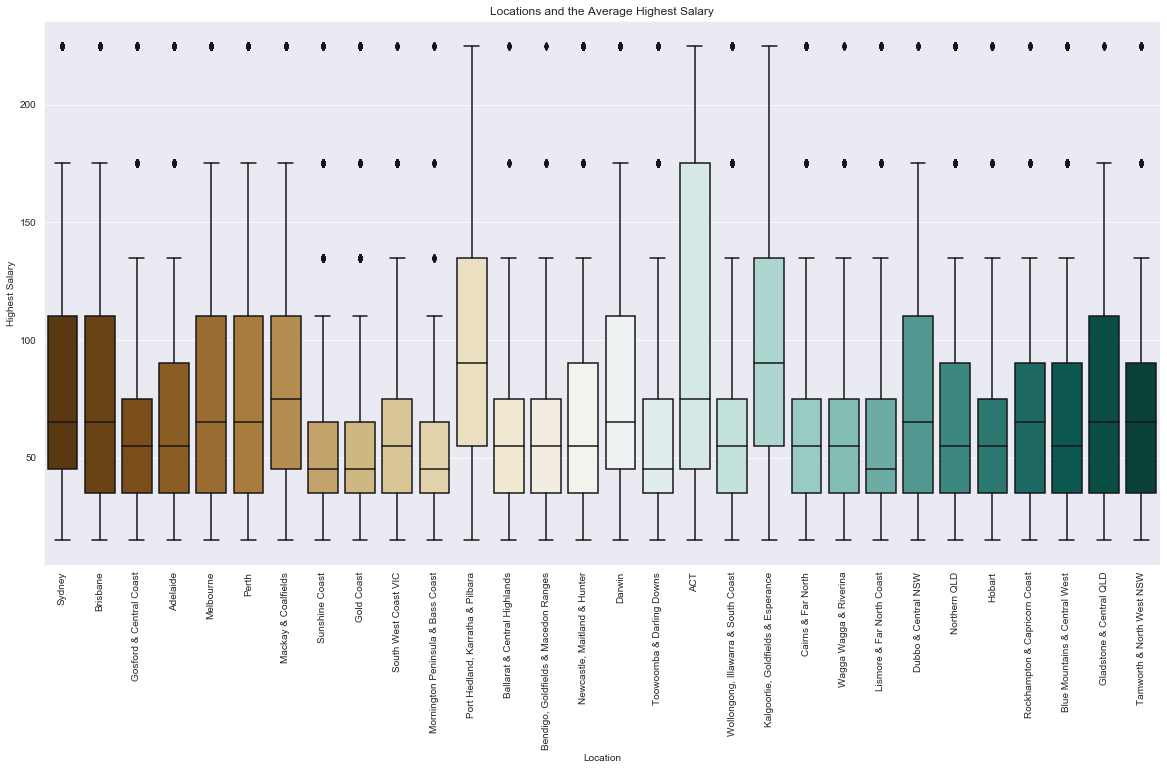

In [40]:
plt.figure(figsize=(20,10))
ax=sns.boxplot(x="Location",y="HighestSalary",data=top_cities_df,palette=sns.color_palette("BrBG", 30))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.title("Locations and the Average Highest Salary")
plt.ylabel("Highest Salary")
plt.show()

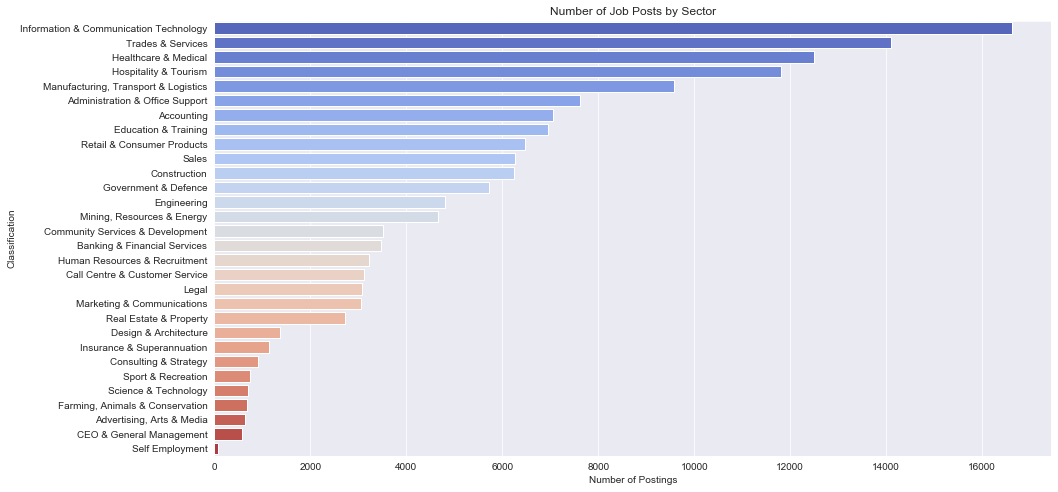

In [37]:
class_count = data['Classification'].value_counts()
plt.figure(figsize=(15,8))
sns.countplot(y="Classification",
              data=data,order=class_count.index,palette=sns.color_palette("coolwarm", len(class_count)))
plt.title('Number of Job Posts by Sector')
plt.xlabel('Number of Postings')
plt.show()